# Training and Testing Classifier on Synthetic Dataset

## Different optimizers considers:
1. Sklearn's default optimizer
2. My coded optimizer directly solving the equation
3. Using Bayesian-based optimizer
4. Gradient Descent

In [2]:
# Linear Regression Class

# Useful import
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression as LRS


In [1]:
#1. fit and predict using: my coded optizer to solve the equations
#2. fit2 and predict2 using sklearn library


class LinearRegression:

    thetha = None
    reg = None

    def fit(self, X, Y):
      #print('fit called')
      #print(self.X, self.Y)

      #self.setData(X, Y)

      X_new = []

      for x in X:
        X_new.append([1, x])
      
      X = np.array(X_new)

      Y = np.array(Y)
      Y  = Y.reshape(Y.shape[0], 1)

      # Solving the LR equation
      Xt = X.transpose()
      XtX = np.matmul(Xt, X)
      
      IXtX = inv(XtX)
      
      XtY = np.matmul(Xt, Y)

      thetha = np.matmul(IXtX, XtY)

      #print(thetha)
      self.thetha = thetha

    def predict(self, X_test):
      #print('predict called')

      X_new = []

      for x in X_test:
        X_new.append([1, x])
      
      X_new = np.array(X_new)
      
      X_new = X_new.transpose()

      predict_Y = np.matmul(self.thetha.transpose(), X_new)
      #print(predict_Y.shape)
      predict_Y = predict_Y.reshape(predict_Y.shape[1], 1)
      return predict_Y


    def fit2(self, X, Y):
      X_train_sk = np.array(X)
      X_train_sk = X_train_sk.reshape(X_train_sk.shape[0], 1)
      reg = LRS().fit(X_train_sk, Y)

      self.reg = reg
    
    def predict2(self, X_test):
      X_train_sk = np.array(X_test)
      X_train_sk = X_train_sk.reshape(X_train_sk.shape[0], 1)

      Y_predict = self.reg.predict(X_train_sk)

      return Y_predict

# Generate a synthetic dataset

In [3]:
import random 

#making some fake data
num_points = 100

random_range = 20
intercept = 4
slope = 3

intercept_expected = intercept+ random_range/2.0 


def createData(num_points):
  X = []
  Y = []

  for i in range(num_points):
    X.append(i)
    y = slope*i + intercept + random.random()*random_range
    Y.append(y)
  
  return X, Y

In [4]:
# create training data 

X_train, Y_train =  createData(num_points)

In [5]:
# create test data

X_test, Y_test =  createData(num_points)

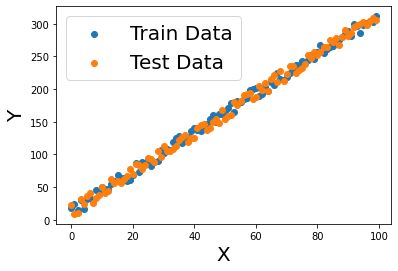

In [6]:
# visualize the train and test data

from matplotlib import pyplot as plt
plt.scatter(X_train,Y_train, label = 'Train Data')
plt.scatter(X_test, Y_test, label = 'Test Data')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


#A: Using my coded Optimizer

In [7]:
# Let us play with the Linear Regression Optimizers

LR = LinearRegression()
LR.fit(X_train, Y_train)

In [8]:
Y_predict = LR.predict(X_test)

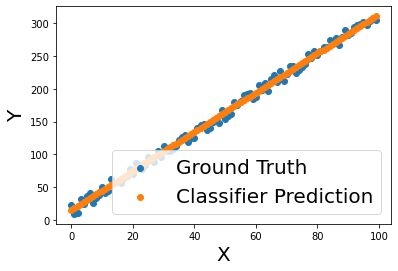

In [9]:
# See the predict

from matplotlib import pyplot as plt
plt.scatter(X_test,Y_test, label = 'Ground Truth')
plt.scatter(X_test, Y_predict, label = 'Classifier Prediction')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


#B: Using Sklearn Optimizer